<img src="petrel2python.png" style="width:350px" align="center">

<h1><center>Petrel to Python 1</center></h1>

Notebook created by **Manuel David Soto**, E&P Technical Direction. Data, from a Demo project, provided by **Ernesto Tundidor**, Accenture. May 2021

## Objective

The objective of this notebook is to compare thickness obtained in Petrel from tops and from a seismic surface, and then find the best regression between them.  

## Libraries loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data loading

The data collected from the Petrel's spread sheets can be saved in the Clipboard, from there you two options:

* Take the data directly from the Clipboard by the code bellow
* Take the data from files (csv preferably) created from the Clipboard

These data may or may not include the headers, you have the option of create them while loading as is do bellow.

In [2]:
# Data directly from the Clipboard

# df_thick_top = pd.read_clipboard(sep='\t')

In [3]:
# CSV file with thickness from tops. Header ara not included so they are declare while creating the dateframe

column_names = ['x', 'y', 't_tops']
df_thick_tops = pd.read_csv('thickness_tops.txt', header=None, names=column_names, delimiter=' ')
df_thick_tops

,x,y,t_tops
0,457379.271643,6.786013e+06,155.526306
1,455308.000000,6.784068e+06,195.771317
2,456514.729518,6.784049e+06,131.527908
3,457762.825164,6.787130e+06,153.312592
4,453085.280980,6.786788e+06,161.561844
5,454716.938301,6.787607e+06,164.967438
6,456316.580185,6.788725e+06,171.330933
7,454901.278237,6.786211e+06,183.970886
8,453523.008381,6.783002e+06,206.482803
9,451496.662828,6.781788e+06,164.978958


In [4]:
# CSV file with thickness from a seismic surface. Header ara not included so they are declare while creating the dateframe

column_names = ['x', 'y', 't_surf']
df_thick_surf = pd.read_csv('thickness_surface.txt', header=None, names=column_names, delimiter=' ')
df_thick_surf

,x,y,t_surf
0,457379.271643,6.786013e+06,147.528824
1,455308.000000,6.784068e+06,201.745178
2,456514.729518,6.784049e+06,128.291351
3,457762.825164,6.787130e+06,150.312195
4,453085.280980,6.786788e+06,196.132965
5,454716.938301,6.787607e+06,193.104492
6,456316.580185,6.788725e+06,177.770599
7,454901.278237,6.786211e+06,204.824753
8,453523.008381,6.783002e+06,222.614792
9,451496.662828,6.781788e+06,185.659836


In [5]:
# Verifing xs are equal

df_thick_tops.x == df_thick_surf.x

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
Name: x, dtype: bool

In [6]:
# Verifing ys are equal

df_thick_tops.y == df_thick_surf.y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
Name: y, dtype: bool

## Join dataframes

As the x and y are the same in both dataframes we can join them together, do the difference between the thickness, and then show the characteristics of the join dataframe.

In [7]:
# Join dataframe

df_join = df_thick_tops
df_join['t_surf'] = df_thick_surf.t_surf
df_join

,x,y,t_tops,t_surf
0,457379.271643,6.786013e+06,155.526306,147.528824
1,455308.000000,6.784068e+06,195.771317,201.745178
2,456514.729518,6.784049e+06,131.527908,128.291351
3,457762.825164,6.787130e+06,153.312592,150.312195
4,453085.280980,6.786788e+06,161.561844,196.132965
5,454716.938301,6.787607e+06,164.967438,193.104492
6,456316.580185,6.788725e+06,171.330933,177.770599
7,454901.278237,6.786211e+06,183.970886,204.824753
8,453523.008381,6.783002e+06,206.482803,222.614792
9,451496.662828,6.781788e+06,164.978958,185.659836


In [8]:
# New column with the differece of thickness

df_join = df_thick_tops
df_join['delta'] = df_join.t_tops - df_join.t_surf
df_join

,x,y,t_tops,t_surf,delta
0,457379.271643,6.786013e+06,155.526306,147.528824,7.997482
1,455308.000000,6.784068e+06,195.771317,201.745178,-5.973861
2,456514.729518,6.784049e+06,131.527908,128.291351,3.236557
3,457762.825164,6.787130e+06,153.312592,150.312195,3.000397
4,453085.280980,6.786788e+06,161.561844,196.132965,-34.571121
5,454716.938301,6.787607e+06,164.967438,193.104492,-28.137054
6,456316.580185,6.788725e+06,171.330933,177.770599,-6.439666
7,454901.278237,6.786211e+06,183.970886,204.824753,-20.853867
8,453523.008381,6.783002e+06,206.482803,222.614792,-16.131989
9,451496.662828,6.781788e+06,164.978958,185.659836,-20.680878


In [9]:
df_join.describe()

,x,y,t_tops,t_surf,delta
count,13.000000,1.300000e+01,13.000000,13.000000,13.000000
mean,455244.492933,6.785502e+06,171.286081,174.705312,-3.419231
std,2130.532323,1.932820e+03,21.283699,37.327225,30.130888
min,451496.662828,6.781788e+06,131.527908,98.401115,-34.571121
25%,453523.008381,6.784068e+06,155.526306,147.528824,-20.680878
50%,455308.000000,6.786013e+06,164.978958,185.659836,-6.439666
75%,457379.271643,6.786788e+06,184.024139,201.745178,3.236557
max,457762.825164,6.788725e+06,206.482803,222.614792,85.623024


## Exploratory plots

Let's do some plots to understand the differences between the two estimations of thickness.

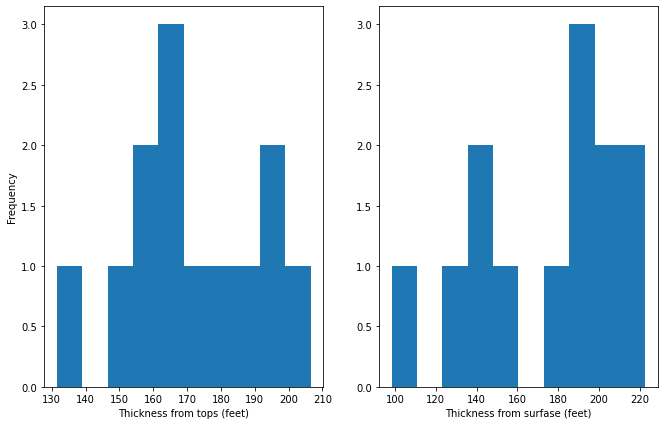

In [10]:
# Histograms

plt.figure(1, figsize=(11, 7))

plt.subplot(1, 2, 1)
plt.hist(df_join.t_tops)
plt.xlabel('Thickness from tops (feet)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_join.t_surf)
plt.xlabel('Thickness from surfase (feet)');

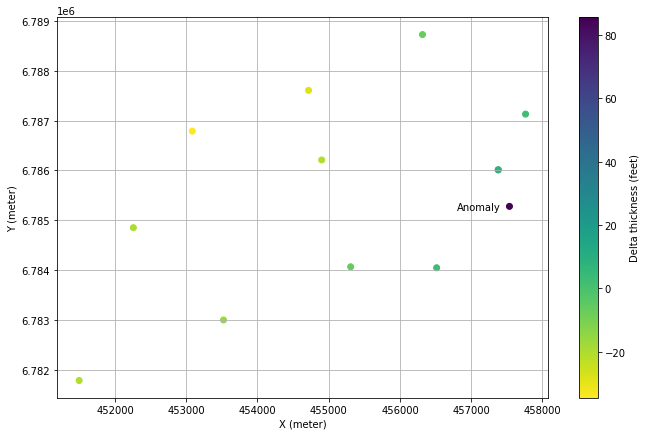

In [11]:
# Map with the location of the anomaly

plt.figure(2, figsize=(11, 7))
plt.scatter(df_join.x, df_join.y, c=df_join.delta, cmap='viridis_r')
plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')
plt.grid(True)
plt.text(456800, 6785200, 'Anomaly');
cb = plt.colorbar()
cb.set_label('Delta thickness (feet)')

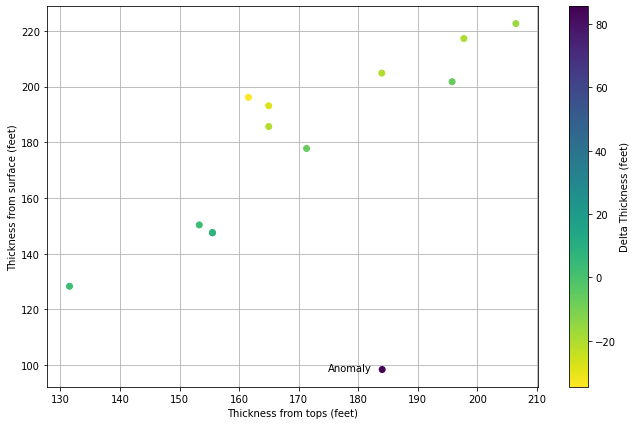

In [12]:
# Crossplot

plt.figure(3, figsize=(11, 7))
plt.scatter(df_join.t_tops, df_join.t_surf, c=df_join.delta, cmap='viridis_r')
plt.xlabel('Thickness from tops (feet)')
plt.ylabel('Thickness from surface (feet)')
plt.text(175, 98, 'Anomaly');
plt.grid(True)
cb = plt.colorbar()
cb.set_label('Delta Thickness (feet)');

# Regression

Functions `np.polyfit` and `np.poly1d` are powerful tools to do polynomial regressions of different degrees. Some time, as in the case of the permeability (k), a variable linearization (log(k)) is required but not in this case. Other important variable linearization are shown bellow:


Relationship |  Example   |     General Eqn.     |  Altered Var.  |        Linearized Eqn.  
-------------|------------|----------------------|----------------|------------------------------------------
Linear       | x          | y =     B * x    + C | -              |        y =   C    + B * x
Logarithmic  | log(x)     | y = A * log(B*x) + C | log(x)         |        y =   C    + A * (log(B) + log(x))
Exponential  | 2^x, e^x | y = A * exp(B*x) + C | log(y)         | log(y-C) = log(A) + B * x
Power        | x^2       | y =     B * x^N + C | log(x), log(y) | log(y-C) = log(B) + N * log(x)

Table from: https://www.mmbyte.com/article/45748.html

## Definition of the regression function

For later uses

In [13]:
def reg(x, y, degree):
    
    poly_coeff = np.polyfit(x, y, degree)
#   poly_coeff = np.polyfit(x, np.log(y), degree)
    
    newy = np.poly1d(poly_coeff)
    
    e = y - newy(x)
#   e = y - np.exp(newy(x))
    
    mse = mean_squared_error(y, newy(x))
#   mse = mean_squared_error(y, np.exp(newy(x)))
    
    r2 = r2_score(y, newy(x))
    
    return newy, e, mse, r2

## First degree regression and residual

In [14]:
print('Data CC:', df_join.t_tops.corr(df_join.t_surf))
print()

newy1, e, mse, r2= reg(df_join.t_tops, df_join.t_surf, 1)
print('Reggresion equation (y):', newy1)
print()

print('Regresion errors')
print('MSE:' , mse)
print('R2:' , r2)

Data CC: 0.5906184698181037

Reggresion equation (y):  
1.036 x - 2.717

Regresion errors
MSE: 837.4976011055413
R2: 0.3488301768902783


## Regression and residual plots

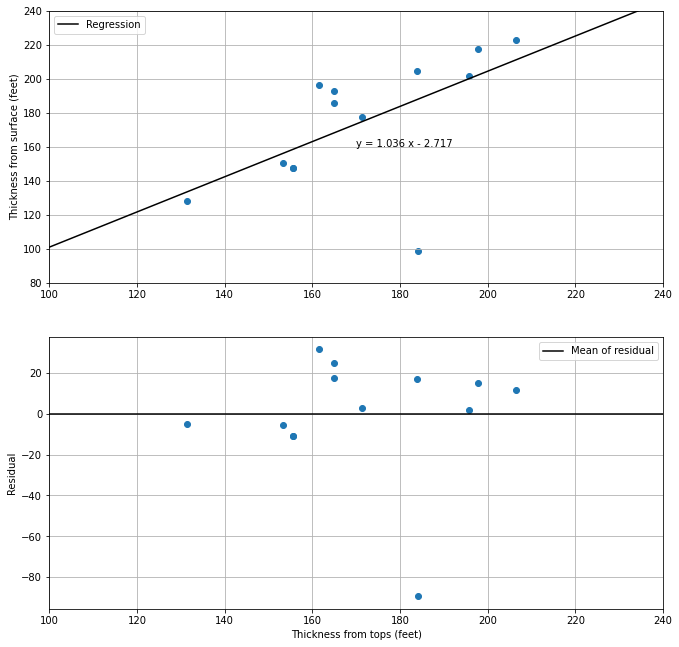

In [15]:
x = np.arange(0, 240, 1)

plt.figure(3, figsize=(11, 11))

plt.subplot(2, 1, 1)
plt.scatter(df_join.t_tops, df_join.t_surf)
plt.plot(x, newy1(x), color='black', label='Regression')
plt.text(170, 160, 'y = '+str(newy1)[2:])
plt.ylabel('Thickness from surface (feet)')
plt.axis([100, 240, 80, 240])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(df_join.t_tops, e)
plt.axhline(y=np.mean(e), color='black', label="Mean of residual")
plt.xlim(100, 240)
plt.xlabel('Thickness from tops (feet)')
plt.ylabel('Residual')
plt.grid(True)
plt.legend();

**Residuals** provide an excellent way to assess the quality of the regression:

 + The sum and mean of the residuals have to be close to zero
 + Residuals have to be randomly distributed around zero
 + Residuals do not have to show patterns
 + Patterns such as those bellow have different implications:
 
 <img src="https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif" style="float:center" width="500px" />

Image from: https://condor.depaul.edu/sjost/it223/documents/regress.htm

Another reference: https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/#x-unbalanced-header

What efacie do you think has the best phi-k regression?

## Dropping the anomalous point

The anomalous point is located at the end of the join dataframe, after that all the metrics and the shape of the residual improve.

In [16]:
df_join = df_join.drop(12)
df_join

,x,y,t_tops,t_surf,delta
0,457379.271643,6.786013e+06,155.526306,147.528824,7.997482
1,455308.000000,6.784068e+06,195.771317,201.745178,-5.973861
2,456514.729518,6.784049e+06,131.527908,128.291351,3.236557
3,457762.825164,6.787130e+06,153.312592,150.312195,3.000397
4,453085.280980,6.786788e+06,161.561844,196.132965,-34.571121
5,454716.938301,6.787607e+06,164.967438,193.104492,-28.137054
6,456316.580185,6.788725e+06,171.330933,177.770599,-6.439666
7,454901.278237,6.786211e+06,183.970886,204.824753,-20.853867
8,453523.008381,6.783002e+06,206.482803,222.614792,-16.131989
9,451496.662828,6.781788e+06,164.978958,185.659836,-20.680878


In [17]:
df_join.describe()

,x,y,t_tops,t_surf,delta
count,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,455053.441542,6.785521e+06,170.224576,181.063995,-10.839419
std,2105.747911,2.017564e+03,21.867723,30.766475,14.476348
min,451496.662828,6.781788e+06,131.527908,128.291351,-34.571121
25%,453413.576531,6.784063e+06,155.526306,149.616352,-20.724125
50%,455104.639118,6.786013e+06,164.973198,189.382164,-11.285827
75%,456730.865049,6.786874e+06,186.920994,202.515072,3.059437
max,457762.825164,6.788725e+06,206.482803,222.614792,7.997482


## First degree regression and residual without anomalous point

In [18]:
print('Data CC:', df_join.t_tops.corr(df_join.t_surf))
print()

newy1, e, mse, r2= reg(df_join.t_tops, df_join.t_surf, 1)
print('Reggresion equation (y):', newy1)
print()

print('Regresion errors')
print('MSE:' , mse)
print('R2:' , r2)

Data CC: 0.903107703194117

Reggresion equation (y):  
1.271 x - 35.23

Regresion errors
MSE: 159.99984065968795
R2: 0.815603523568553


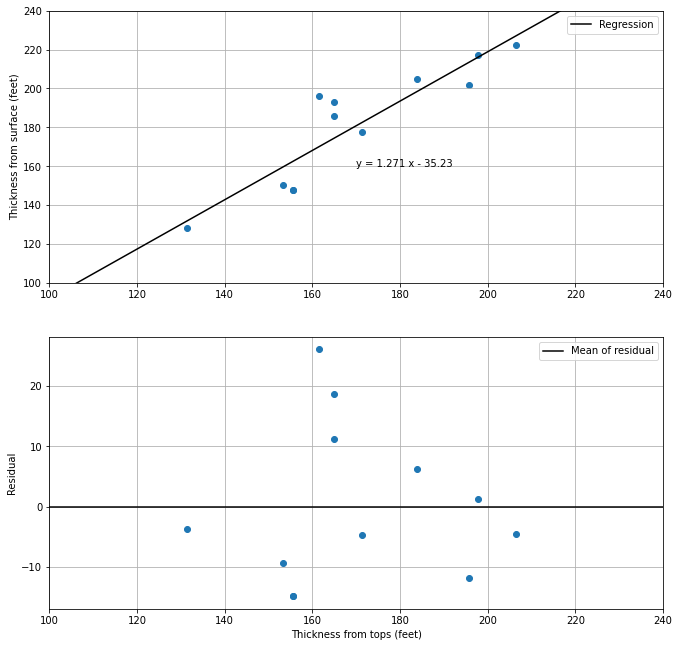

In [19]:
plt.figure(4, figsize=(11, 11))

plt.subplot(2, 1, 1)
plt.scatter(df_join.t_tops, df_join.t_surf)
plt.plot(x, newy1(x), color='black', label='Regression')
plt.text(170, 160, 'y = '+str(newy1)[2:])
plt.ylabel('Thickness from surface (feet)')
plt.axis([100, 240, 100, 240])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(df_join.t_tops, e)
plt.axhline(y=np.mean(e), color='black', label="Mean of residual")
plt.xlim(100, 240)
plt.xlabel('Thickness from tops (feet)')
plt.ylabel('Residual')
plt.grid(True)
plt.legend();

## Second degree polynomial

You can see that the errors improves even more with a second degree polynomial

In [22]:
print('Data CC:', df_join.t_tops.corr(df_join.t_surf))
print()

newy2, e, mse, r2= reg(df_join.t_tops, df_join.t_surf, 2)
print('Reggresion equation (y):', newy2)
print()

print('Regresion errors')
print('MSE:' , mse)
print('R2:' , r2)

Data CC: 0.903107703194117

Reggresion equation (y):            2
-0.008219 x + 4.096 x - 274.5

Regresion errors
MSE: 144.11349948564896
R2: 0.8339122001509959


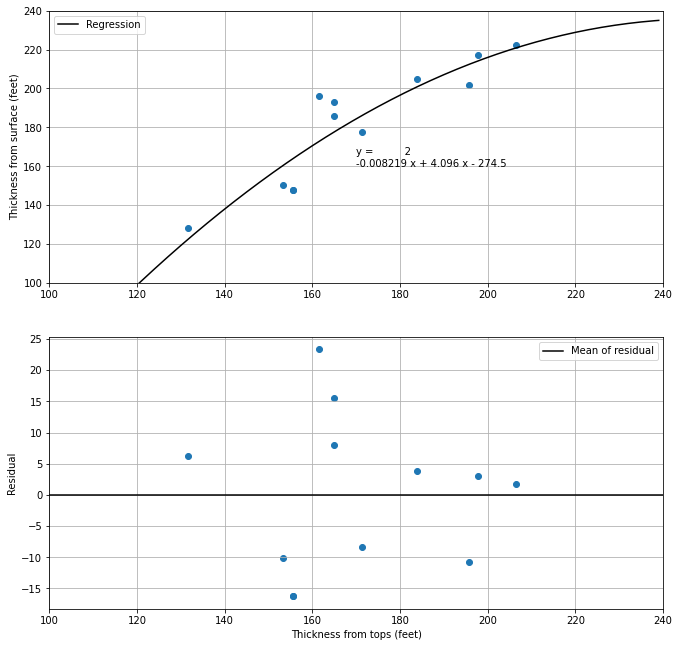

In [23]:
x = np.arange(0, 240, 1)

plt.figure(3, figsize=(11, 11))

plt.subplot(2, 1, 1)
plt.scatter(df_join.t_tops, df_join.t_surf)
plt.plot(x, newy2(x), color='black', label='Regression')
plt.text(170, 160, 'y = '+str(newy2)[2:])
plt.ylabel('Thickness from surface (feet)')
plt.axis([100, 240, 100, 240])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(df_join.t_tops, e)
plt.axhline(y=np.mean(e), color='black', label="Mean of residual")
plt.xlim(100, 240)
plt.xlabel('Thickness from tops (feet)')
plt.ylabel('Residual')
plt.grid(True)
plt.legend();

In this case, base on the regression metrics, the second degree regression appears to be better. The regression and residual plots also suggest that. 